In [1]:
# setup + imports
%matplotlib inline
%config InlineBackend.figure_format='retina'

import astropy.units as u
import astropy.coordinates as coord
import numpy as np
import seaborn as sns
sns.set(style='white', font_scale=1.2)

## If you are looking towards RA=0, Dec=0, at a sample of halo stars with M<sub>r</sub>=5 and r = 21:

### a) what is their heliocentric distance?

In [2]:
distance = coord.Distance(distmod=(21 - 5))
distance

<Distance 15.848931924611142 kpc>

### b) what is their galactocentric distance?

In [3]:
c = coord.ICRS(ra=0*u.degree, dec=0*u.degree, distance=distance)
c_galactic = c.transform_to(coord.Galactocentric)
c_galactic.represent_as('spherical').distance

<Distance 18.289766451276456 kpc>

In [4]:
# motion components; draw 10^6 samples

# random seed
np.random.seed(420)

N = 1000000
v_rho = np.random.normal(loc=0, scale=135, size=N) * u.km/u.s
v_phi = np.random.normal(loc=0, scale=85, size=N) * u.km/u.s
v_z = np.random.normal(loc=0, scale=85, size=N) * u.km/u.s

# astropy hates things
v_phi /= c_galactic.represent_as('spherical').distance
v_phi *= u.rad
v_phi = v_phi.to(u.rad/u.s)

In [5]:
c_cyl = c.represent_as('cylindrical')
c_cyl

<CylindricalRepresentation (rho, phi, z) in (kpc, rad, kpc)
    ( 15.84893192,  0.,  0.)>

In [6]:
c_new = coord.ICRS([c_cyl.rho]*N, [c_cyl.phi]*N, [c_cyl.z]*N,
               d_rho=v_rho, d_phi=v_phi, d_z=v_z,
               representation=coord.CylindricalRepresentation,
               differential_cls=coord.CylindricalDifferential)

# convert to spherical units
c_new.representation = 'spherical'
c_new

<ICRS Coordinate: (ra, dec, distance) in (deg, deg, kpc)
    [( 0.,  0.,  15.84893192), ( 0.,  0.,  15.84893192),
     ( 0.,  0.,  15.84893192), ..., ( 0.,  0.,  15.84893192),
     ( 0.,  0.,  15.84893192), ( 0.,  0.,  15.84893192)]
 (pm_ra, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
    [( 1.66715024,  0.44389322,  -65.52776507),
     (-0.16776329, -0.32412249, -257.19576922),
     ( 0.58608958,  1.35523834,  -71.0399426 ), ...,
     ( 0.75715914,  0.26501665,  126.30670951),
     (-0.9689931 , -0.4754301 ,   53.55335719),
     ( 0.76771911, -0.0492529 ,  116.48471137)]>

Median RA PM: 0.00013 mas / yr
Median Dec PM: -0.00087 mas / yr
RMS RA PM: 0.97924 mas / yr
RMS Dec PM: 1.13067 mas / yr


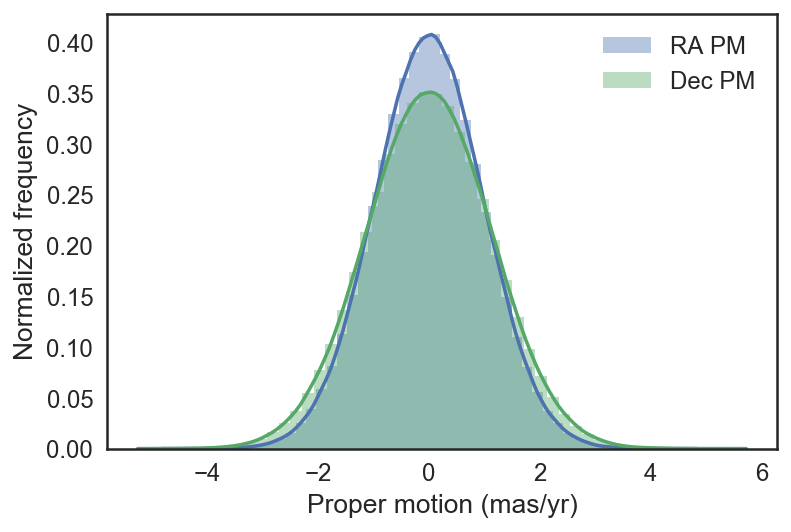

In [7]:
ax = sns.distplot(c_new.pm_ra, label='RA PM')
sns.distplot(c_new.pm_dec, label='Dec PM')
ax.legend()
ax.set_xlabel('Proper motion (mas/yr)')
ax.set_ylabel('Normalized frequency')
print('Median RA PM: {:.5f}'.format(np.median(c_new.pm_ra)))
print('Median Dec PM: {:.5f}'.format(np.median(c_new.pm_dec)))
print('RMS RA PM: {:.5f}'.format(np.std(c_new.pm_ra)))
print('RMS Dec PM: {:.5f}'.format(np.std(c_new.pm_dec)))

### d) what is the median and rms for their observed radial velocity?

Median radial velocity: -0.17129 km / s
RMS radial velocity: 134.98788 km / s


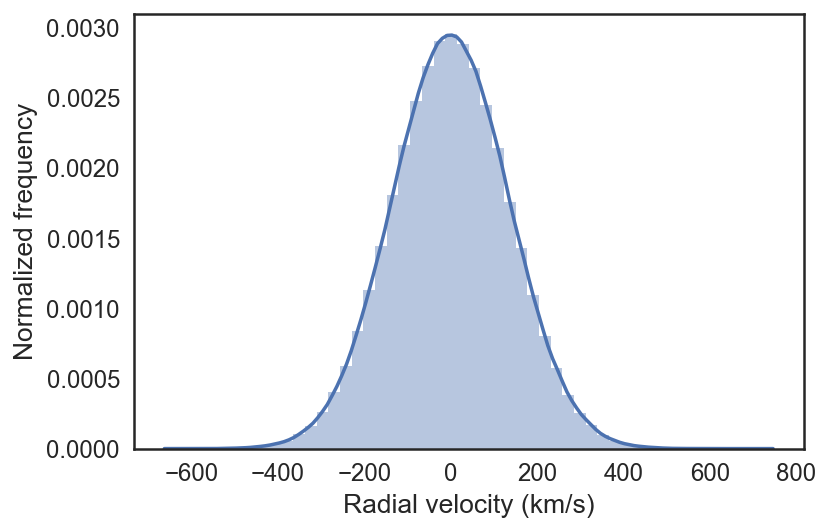

In [8]:
ax = sns.distplot(c_new.radial_velocity)
ax.set_xlabel('Radial velocity (km/s)')
ax.set_ylabel('Normalized frequency')
print('Median radial velocity: {:.5f}'.format(np.median(c_new.radial_velocity)))
print('RMS radial velocity: {:.5f}'.format(np.std(c_new.radial_velocity)))